# Q3
Dense Neural Network: Implement a feedforward neural network with dense layers only. Specify the number of hidden layers, neurons
per layer, and activation functions. How will you preprocess the input images? Consider hyperparameter tuning strategies.

In [41]:
import tensorflow as t
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt


In [27]:
(x_train, y_train), (x_test, y_test) = t.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [28]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


#For normalization image pixel values are divided by 255

gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

#To understand the structer of dataset

print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)


Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


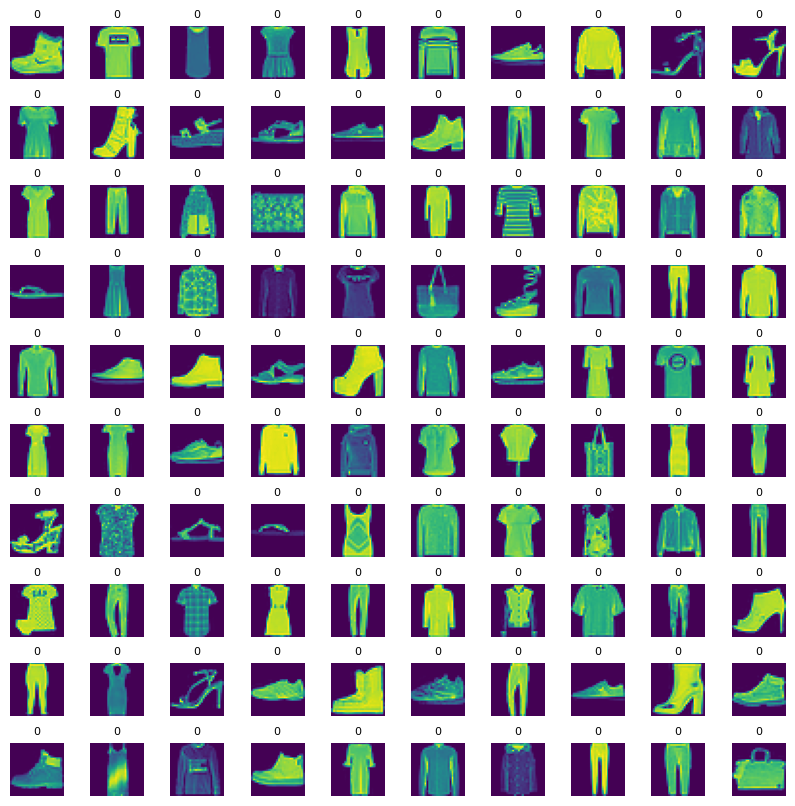

In [40]:

fig, ax = plt.subplots(10, 10, figsize=(10, 10))
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        ax[i][j].axis('off')  
        ax[i][j].set_title(str(y_train[k].argmax()), fontsize=8)  
        k += 1


plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


In [36]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),  # Using ReLU activation function
    Dense(128, activation='relu'),  # Using ReLU activation function
    Dense(10, activation='softmax')  # Using softmax activation for multi-class classification
])

In [37]:
model.compile(optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

In [38]:
model.fit(x_train, y_train, epochs=10,
          batch_size=2000,
          validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 2s 63ms/step - loss: 1.0520 - accuracy: 0.6453 - val_loss: 0.6083 - val_accuracy: 0.7881
Epoch 2/10
24/24 [==============================] - 1s 51ms/step - loss: 0.5474 - accuracy: 0.8119 - val_loss: 0.5409 - val_accuracy: 0.8012
Epoch 3/10
24/24 [==============================] - 2s 78ms/step - loss: 0.4735 - accuracy: 0.8363 - val_loss: 0.4694 - val_accuracy: 0.8348
Epoch 4/10
24/24 [==============================] - 2s 73ms/step - loss: 0.4341 - accuracy: 0.8472 - val_loss: 0.4338 - val_accuracy: 0.8445
Epoch 5/10
24/24 [==============================] - 1s 51ms/step - loss: 0.4079 - accuracy: 0.8575 - val_loss: 0.4125 - val_accuracy: 0.8556
Epoch 6/10
24/24 [==============================] - 1s 50ms/step - loss: 0.3884 - accuracy: 0.8641 - val_loss: 0.3954 - val_accuracy: 0.8579
Epoch 7/10
24/24 [==============================] - 1s 50ms/step - loss: 0.3694 - accuracy: 0.8701 - val_loss: 0.3917 - val_accuracy: 0.8614
Epoch 8/10
24

In [39]:
results = model.evaluate(x_test, y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.39193469285964966, 0.861299991607666]
